SIFT Algorithm to detect and match key points between two images.

Upload first image:


Saving img1.png to img1 (3).png
Upload second image:


Saving img2.jpeg to img2 (3).jpeg


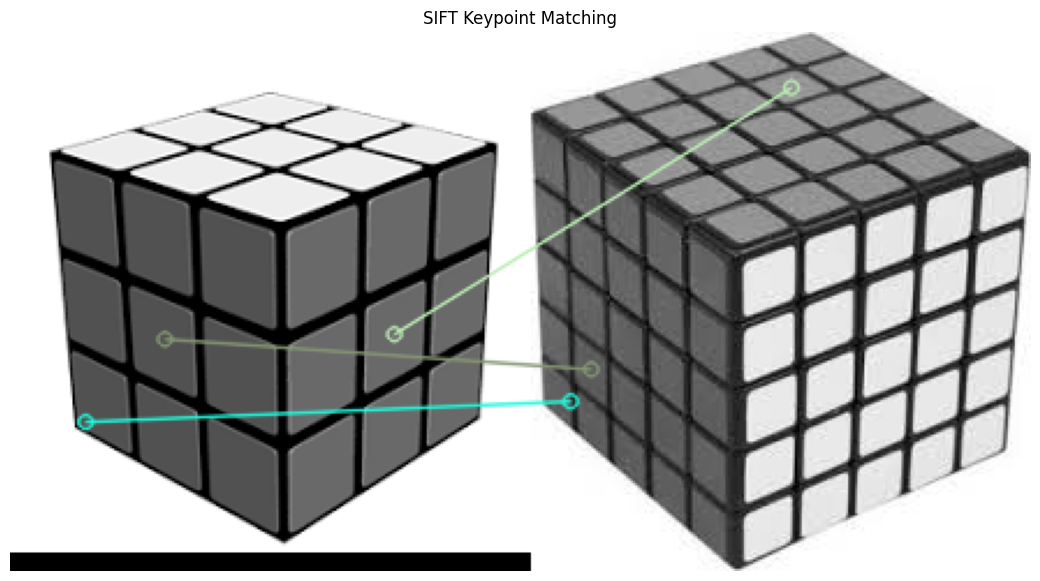

In [3]:
# Step 1: Install OpenCV with contrib (for SIFT)
!pip install opencv-contrib-python --quiet

# Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image, display

# Step 3: Upload two images
print("Upload first image:")
uploaded = files.upload()

img1_path = next(iter(uploaded))

print("Upload second image:")
uploaded = files.upload()
img2_path = next(iter(uploaded))

# Step 4: Detect SIFT keypoints and descriptors
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 5: Match descriptors using Brute-Force Matcher with ratio test
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Step 6: Draw matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Step 7: Show the result
plt.figure(figsize=(14, 7))
plt.imshow(matched_img)
plt.title("SIFT Keypoint Matching")
plt.axis("off")
plt.show()
